In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### scikit-learn 모듈
- Data Cleansing & Feature Engineering
  - `sklearn.preprocessing`: 데이터 전처리 (인코딩, 정규화 등)
  - `sklearn.feature_selection`: feature 선택
  - `sklearn.feature_extraction`: feature 추출 (이미지, 텍스트로 부터 추출)
- Model Evaluation
  - `sklearn.model_selection`: 데이터 분리, 검증 및 모델 튜닝
  - `sklearn.metrics`: 성능 평가
- Supervised Learning Algorithm
  - `sklearn.linear_model`: 선형 모델
  - `sklearn.svm`: 서포트 벡터 머신
  - `sklearn.tree`: 의사결정나무
  - `sklearn.ensemble`: 앙상블 알고리즘
- Unsupervised Learning Algorithm
  - `sklearn.clsuter`: 군집 분석
  - `sklearn.decomposition`: 차원 축소
- Utility&Dataset
  - `sklearn.pipeline`: 워크플로우 효율화
  - `sklearn.datasets`: 예제 데이터셋

### 데이터 불러오기
train = pd.read_csv('train.csv')

#### feature
- `pclass`: 자리 등급 (1등석, 2등석, 3등석)
- `name`: 승객 이름
- `sex`: 승객 성별
- `age`: 승객 나이
- `sibsp`: 동승한 자매/배우자 수
- `parch`: 동승한 부모/자식 수
- `ticket`: 티켓 번호
- `fare`: 승객 요금
- `cabin`: 방 호수
- `embarked`: 탑승지
- ~`boat`: 탈출한 보트 번호~ <font color='darkgreen'>: target과 직접적인 연관이 있으므로 제외</font>
- ~`body`: 사망자 확인 번호~ : <font color='darkgreen'>target과 직접적인 연관이 있으므로 제외</font>
- `home.dest`: 고향/목적지

#### target
- `survived`: 생존 여부

In [ ]:
# 타이타닉 생존자 데이터
from sklearn.datasets import fetch_openml

In [ ]:
data = fetch_openml('titanic', version=1,as_frame=True
)

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# boat, body를 통해 생존여부를 바로 확인할 수 있으므로 제거
X = data.data.drop(columns=['boat', 'body'])
y = data.target

In [ ]:
#사망하면 0으로 생존은 1
display(X.head(3))
display(y.head(3))

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

### 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
X_train.shape

(916, 11)

In [ ]:
X_test.shape

(393, 11)

### EDA(탐색적 데이터 분석)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     916 non-null    float64 
 1   name       916 non-null    object  
 2   sex        916 non-null    category
 3   age        741 non-null    float64 
 4   sibsp      916 non-null    float64 
 5   parch      916 non-null    float64 
 6   ticket     916 non-null    object  
 7   fare       916 non-null    float64 
 8   cabin      214 non-null    object  
 9   embarked   914 non-null    category
 10  home.dest  527 non-null    object  
dtypes: category(2), float64(5), object(4)
memory usage: 73.5+ KB


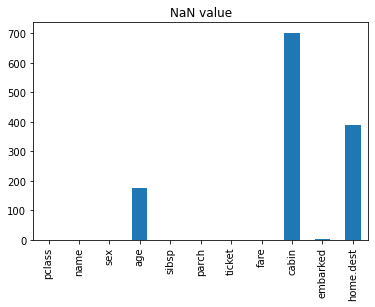

In [ ]:
X_train.isna().sum().plot.bar()
plt.title('NaN value')
plt.show()
#결측값 확인

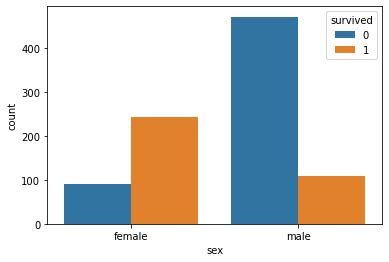

In [ ]:
d = pd.concat([X_train.sex, y_train], axis=1)
sns.countplot(data=d, x='sex', hue='survived')
plt.show()
#생존자에 따라 성별 구분 확인 

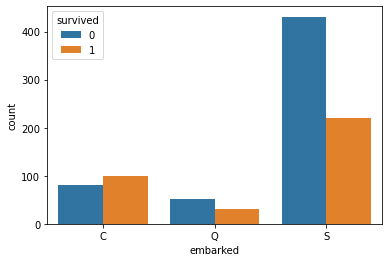

In [ ]:
d = pd.concat([X_train.embarked, y_train], axis=1)
sns.countplot(data=d, x='embarked', hue='survived')
plt.show()

In [ ]:
#탑승지가 2구역인 사람들의 생존율이 더 낮았따

In [ ]:
X_train['fare'].describe()

count    916.000000
mean      32.532050
std       47.416524
min        0.000000
25%        7.895800
50%       14.454200
75%       31.275000
max      512.329200
Name: fare, dtype: float64

In [ ]:
#X_train['fare'].apply(lambda x: 1 if x>31 else 2 if 14<x<=31 else 3 if 8<x<=14 else 4 if x<=8 ,X_trian['fare'])

In [ ]:
X_train.groupby('sibsp')['parch'].count()

sibsp
0.0    615
1.0    227
2.0     32
3.0     12
4.0     16
5.0      5
8.0      9
Name: parch, dtype: int64

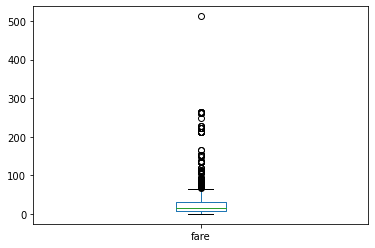

In [ ]:
X_train.fare.plot.box()
plt.show()
#결측값 먼저 채우고 이상치 처리 필요

### 데이터 전처리
검증, 평가 데이터셋에도 **"동일"**한 전처리를 수행해줘야 함

이상치 처리

In [ ]:
upper = X_train.fare.quantile(.25) + 1.5*(X_train.fare.quantile(.75) - X_train.fare.quantile(.25))
print(upper)
#윗부분 이상치 처리

42.9646


In [ ]:
X_train.fare = X_train.fare.clip(upper=upper)

C:\Users\kim ji eun\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


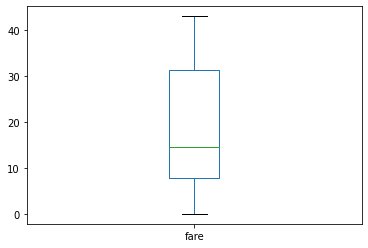

In [ ]:
X_train.fare.plot.box()
plt.show()
#변화된걸 확인가능

In [ ]:
X_test.fare = X_test.fare.clip(upper=upper)

C:\Users\kim ji eun\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


결측값 처리

In [ ]:
X_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
501,2.0,"Mellinger, Miss. Madeleine Violet",female,13.0000,0.0,1.0,250644,19.5000,None,S,"England / Bennington, VT"
588,2.0,"Wells, Miss. Joan",female,4.0000,1.0,1.0,29103,23.0000,None,S,"Cornwall / Akron, OH"
402,2.0,"Duran y More, Miss. Florentina",female,30.0000,1.0,0.0,SC/PARIS 2148,13.8583,None,C,"Barcelona, Spain / Havana, Cuba"
1193,3.0,"Scanlan, Mr. James",male,NaN,0.0,0.0,36209,7.7250,None,Q,None
686,3.0,"Bradley, Miss. Bridget Delia",female,22.0000,0.0,0.0,334914,7.7250,None,Q,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...
763,3.0,"Dean, Miss. Elizabeth Gladys 'Millvina'",female,0.1667,1.0,2.0,C.A. 2315,20.5750,None,S,"Devon, England Wichita, KS"
835,3.0,"Guest, Mr. Robert",male,NaN,0.0,0.0,376563,8.0500,None,S,None
1216,3.0,"Smyth, Miss. Julia",female,NaN,0.0,0.0,335432,7.7333,None,Q,None
559,2.0,"Sincock, Miss. Maude",female,20.0000,0.0,0.0,C.A. 33112,36.7500,None,S,"Cornwall / Hancock, MI"


In [ ]:
X_train['age'] = X_train.age.fillna(X_train.age.mean())
X_train['cabin'] = X_train.cabin.fillna(X_train.cabin.mode()[0]) #범주형 데이터 -> 최빈값
X_train['embarked'] = X_train.embarked.fillna(X_train.embarked.mode()[0])
X_train['home.dest'] = X_train['home.dest'].fillna('결측치')

<ipython-input-736-f29c47a416c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'] = X_train.age.fillna(X_train.age.mean())
<ipython-input-736-f29c47a416c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cabin'] = X_train.cabin.fillna(X_train.cabin.mode()[0]) #범주형 데이터 -> 최빈값
<ipython-input-736-f29c47a416c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
X_test['age'] = X_test.age.fillna(X_train.age.mean())
X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
X_test['cabin'] = X_test.cabin.fillna(X_train.cabin.mode()[0])
X_test['embarked'] = X_test.embarked.fillna(X_train.embarked.mode()[0])
X_test['home.dest'] = X_test['home.dest'].fillna('결측치')
#train 데이터를 토대로 전처리

<ipython-input-737-a5c0c7bd6314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age'] = X_test.age.fillna(X_train.age.mean())
<ipython-input-737-a5c0c7bd6314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
<ipython-input-737-a5c0c7bd6314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

범주형 변수 처리

In [ ]:
X_train.sex = X_train.sex.replace(['male', 'female'], [0, 1]) #string을 0,1로 변환
X_test.sex = X_test.sex.replace(['male', 'female'], [0, 1])

value2idx = {x:i for i, x in enumerate(X_train.ticket.unique())}
X_train['ticket'] = X_train.ticket.map(lambda x: value2idx[x])
X_test['ticket'] = X_test.ticket.map(lambda x: value2idx.get(x,-1))

value2idx = {x:i for i, x in enumerate(X_train.cabin.unique())}
X_train['cabin'] = X_train.cabin.map(lambda x: value2idx[x])
X_test['cabin'] = X_test.cabin.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train.embarked.cat.categories)}
X_train['embarked'] = X_train.embarked.map(lambda x: value2idx[x])
X_test['embarked'] = X_test.embarked.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train['home.dest'].unique())}
X_train['home.dest'] = X_train['home.dest'].map(lambda x: value2idx[x])
X_test['home.dest'] = X_test['home.dest'].map(lambda x: value2idx.get(x, -1))

C:\Users\kim ji eun\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-738-e5fc5d68f0e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ticket'] = X_train.ticket.map(lambda x: value2idx[x])
<ipython-input-738-e5fc5d68f0e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
X_train = X_train.drop(columns='name')
X_test = X_test.drop(columns='name')
#이름에 따라 생존여부가 바뀌는 것은 아니기에 삭제

# ticket도 쓸모 없어보여서 삭제함. 성능 오름.

In [ ]:
X_train = X_train.drop(columns='ticket')
X_test = X_test.drop(columns='ticket')

In [ ]:
#X_train = X_train.drop(columns='cabin')
#X_test = X_test.drop(columns='cabin') 성능떨어짐

In [ ]:
#X_train = X_train.drop(columns='home.dest')
#X_test = X_test.drop(columns='home.dest')  이건 성능 떨어짐

### feature 생성

In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
501,2.0,1,13.000000,0.0,1.0,19.5000,0,2,0
588,2.0,1,4.000000,1.0,1.0,23.0000,0,2,1
402,2.0,1,30.000000,1.0,0.0,13.8583,0,0,2
1193,3.0,0,30.231444,0.0,0.0,7.7250,0,1,3
686,3.0,1,22.000000,0.0,0.0,7.7250,0,1,4


### 나이대 피쳐 성능 떨어져서 지움

In [ ]:
# feature 생성 예시
#X_train["나이대"] = X_train.age.map(lambda x: str(int(x))[0]+'0대' if len(str(int(x)))==2 else "00대")
#
#value2idx = {x:i for i, x in enumerate(sorted(X_train.나이대.unique()))}
#value2idx["80대"]=8
#X_train['나이대'] = X_train.나이대.map(lambda x: value2idx[x])
#
#X_test["나이대"] = X_test.age.map(lambda x: str(int(x))[0]+'0대' if len(str(int(x)))==2 else "00대")
#
#X_test['나이대'] = X_test.나이대.map(lambda x: value2idx[x])

In [ ]:
value2idx

{'England / Bennington, VT': 0,
 'Cornwall / Akron, OH': 1,
 'Barcelona, Spain / Havana, Cuba': 2,
 '결측치': 3,
 'Kingwilliamstown, Co Cork, Ireland Glens Falls, NY': 4,
 'Plymouth, Devon / Detroit, MI': 5,
 'Haverford, PA': 6,
 'St Louis, MO': 7,
 'Weston-Super-Mare, Somerset': 8,
 'Montreal, PQ / Chesterville, ON': 9,
 'Oslo, Norway Bayonne, NJ': 10,
 'England': 11,
 'Southsea, Hants': 12,
 'Syria New York, NY': 13,
 'Greece': 14,
 'Cologne, Germany': 15,
 'Southampton': 16,
 'Basel, Switzerland': 17,
 'Trenton, NJ': 18,
 'New York, NY': 19,
 'Philadelphia, PA': 20,
 'Salo, Finland Astoria, OR': 21,
 'Bronx, NY': 22,
 'Ruotsinphytaa, Finland New York, NY': 23,
 'Belfast': 24,
 'Vancouver, BC': 25,
 'Wimbledon Park, London / Hayling Island, Hants': 26,
 'New York, NY / Ithaca, NY': 27,
 'Paris / Haiti': 28,
 'Windsor, England New York, NY': 29,
 'Minneapolis, MN': 30,
 'New York, NY /  Stamford CT': 31,
 'Bournmouth, England': 32,
 'Antwerp, Belgium / Stanton, OH': 33,
 'Paris, France':

In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,survived
0,2.0,1,13.000000,0.0,1.0,19.5000,0,2,0,0.728358
1,2.0,1,4.000000,1.0,1.0,23.0000,0,2,1,0.728358
2,2.0,1,30.000000,1.0,0.0,13.8583,0,0,2,0.728358
3,3.0,0,30.231444,0.0,0.0,7.7250,0,1,3,0.187608
4,3.0,1,22.000000,0.0,0.0,7.7250,0,1,4,0.728358


In [ ]:
X_train['sex']

0      1
1      1
2      1
3      0
4      1
      ..
911    1
912    0
913    1
914    1
915    1
Name: sex, Length: 916, dtype: int64

In [ ]:
a=X_train.query('sex=="1"')
#여성 생존자

In [ ]:
X_train.groupby('sex')['age'].mean()

sex
0    30.540201
1    29.695959
Name: age, dtype: float64

In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,survived
0,2.0,1,13.000000,0.0,1.0,19.5000,0,2,0,0.728358
1,2.0,1,4.000000,1.0,1.0,23.0000,0,2,1,0.728358
2,2.0,1,30.000000,1.0,0.0,13.8583,0,0,2,0.728358
3,3.0,0,30.231444,0.0,0.0,7.7250,0,1,3,0.187608
4,3.0,1,22.000000,0.0,0.0,7.7250,0,1,4,0.728358


#### feature
- `pclass`: 자리 등급 (1등석, 2등석, 3등석)
- `name`: 승객 이름
- `sex`: 승객 성별
- `age`: 승객 나이
- `sibsp`: 동승한 자매/배우자 수
- `parch`: 동승한 부모/자식 수
- `ticket`: 티켓 번호
- `fare`: 승객 요금
- `cabin`: 방 호수
- `embarked`: 탑승지
- ~`boat`: 탈출한 보트 번호~ <font color='darkgreen'>: target과 직접적인 연관이 있으므로 제외</font>
- ~`body`: 사망자 확인 번호~ : <font color='darkgreen'>target과 직접적인 연관이 있으므로 제외</font>
- `home.dest`: 고향/목적지

#### target
- `survived`: 생존 여부

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,survived,family
0,2.0,1,13.000000,0.0,1.0,19.5000,0,2,0,0.728358,1.0
1,2.0,1,4.000000,1.0,1.0,23.0000,0,2,1,0.728358,2.0
2,2.0,1,30.000000,1.0,0.0,13.8583,0,0,2,0.728358,1.0
3,3.0,0,30.231444,0.0,0.0,7.7250,0,1,3,0.187608,0.0
4,3.0,1,22.000000,0.0,0.0,7.7250,0,1,4,0.728358,0.0
...,...,...,...,...,...,...,...,...,...,...,...
911,3.0,1,0.166700,1.0,2.0,20.5750,0,2,51,0.728358,3.0
912,3.0,0,30.231444,0.0,0.0,8.0500,0,2,3,0.187608,0.0
913,3.0,1,30.231444,0.0,0.0,7.7333,0,1,3,0.728358,0.0
914,2.0,1,20.000000,0.0,0.0,36.7500,0,2,159,0.728358,0.0


In [ ]:
### 과제: feature를 생성하여 모델의 성능을 높이시오.
### feature 5갯 생성하기
#X_trian[]=~~
#X_test[]=-- 이런식으로 열 추가
# 피처 생성 먼저 후, 열 추가하는 방식으로 진행 
#X_train = pd.merge(X_train, X_train.groupby('나이대')['pclass'].mean().reset_index(), on = '나이대')
#X_test =  pd.merge(X_test, X_test.groupby('나이대')['pclass'].mean().reset_index(), on = '나이대')
#
#X_train = pd.merge(X_train, X_train.groupby('sex')['fare'].mean().reset_index(), on = 'sex')
#X_test =  pd.merge(X_test, X_test.groupby('sex')['fare'].mean().reset_index(), on = 'sex')

X_train['family'] = X_train.sibsp + X_train.parch
X_test['family'] = X_test.sibsp + X_test.parch

#X_train = pd.merge(X_train, X_train.groupby('pclass')['fare'].mean().reset_index(), on = 'pclass')
#X_test =  pd.merge(X_test, X_test.groupby('pclass')['fare'].mean().reset_index(), on = 'pclass')



In [ ]:
#X_train['f_p'] = X_train.fare/X_train.pclass
#X_test['f_p'] = X_test.fare/X_test.pclass 

### 모델 학습

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train) # 모델 학습시에 fit 사

RandomForestClassifier(random_state=0)

### 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score #accuracy_score, roc_auc_score의 2개 평가지표 가져옴

In [ ]:
model.predict(X_test) # 클래스 예측할 때 predict 사용

array(['0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1

In [ ]:
model.predict_proba(X_test) # 각 클래스의 확률 예측
#0일 확률이 0.73, 0일 확률이 0.27

array([[0.86      , 0.14      ],
       [0.05      , 0.95      ],
       [0.95      , 0.05      ],
       [0.96      , 0.04      ],
       [0.87      , 0.13      ],
       [0.27      , 0.73      ],
       [0.84      , 0.16      ],
       [0.76      , 0.24      ],
       [0.94      , 0.06      ],
       [1.        , 0.        ],
       [0.93      , 0.07      ],
       [0.77      , 0.23      ],
       [0.45      , 0.55      ],
       [0.66      , 0.34      ],
       [0.03      , 0.97      ],
       [0.84      , 0.16      ],
       [0.13      , 0.87      ],
       [0.77      , 0.23      ],
       [0.05      , 0.95      ],
       [0.98666667, 0.01333333],
       [0.97      , 0.03      ],
       [0.99      , 0.01      ],
       [0.94166667, 0.05833333],
       [0.05      , 0.95      ],
       [0.28      , 0.72      ],
       [0.15      , 0.85      ],
       [0.93      , 0.07      ],
       [0.97785714, 0.02214286],
       [0.97993182, 0.02006818],
       [0.11      , 0.89      ],
       [0.

In [ ]:
preds = model.predict(X_test)
acc_score = accuracy_score(y_test, preds) # 성능 측정 (정확도) accuracy 사용시에는 predict 메소드

probas = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas) # 성능 측정 (ROC_AUC)에는 predict

print('Accuracy:\t', acc_score) #기존 0.80 정도
print('ROC_AUC:\t', auc_score) #기존 0.84 정도

Accuracy:	 0.816793893129771
ROC_AUC:	 0.8528427631215088
